<a href="https://colab.research.google.com/github/snemmani/ml_ai/blob/master/Lab/Day4_Cybersecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
from os.path import isfile, join
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Malware Detection

In [11]:
file_path = '/content/drive/MyDrive/Datasets/dataset_malwares.csv'

df = pd.read_csv(file_path, sep=",")

In [12]:
print(f"Shape of data is: {df.shape}")
df.head()

Shape of data is: (19611, 79)


,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [13]:
df.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [15]:
df.drop(['Name', 'Machine', 'TimeDateStamp', 'SectionMainChar', 'SectionMinVirtual', 'SectionMinPhysical', 'SectionMaxVirtualsize', 'SectionMaxRawsize', 'SectionMaxEntropy'], axis=1, inplace=True)

<Axes: >

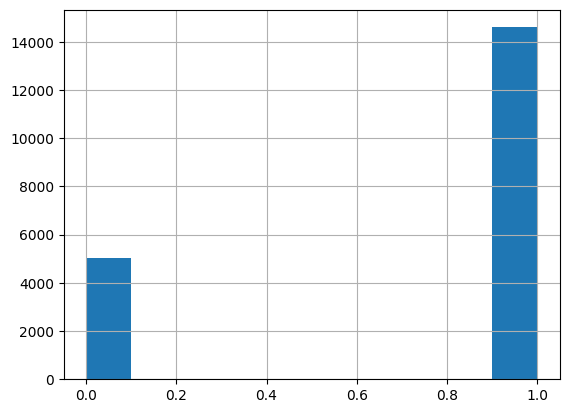

In [16]:
df['Malware'].hist()

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features = df.drop('Malware', axis=1)
targets = df['Malware']

features_scaled = scaler.fit_transform(features)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.2, stratify=targets)

array([[0.00000000e+00, 2.42228502e-03, 4.74683544e-05, ...,
        1.23312469e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.42228502e-03, 4.74683544e-05, ...,
        3.69937407e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.42228502e-03, 4.74683544e-05, ...,
        3.84734903e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.42228502e-03, 4.74683544e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.42228502e-03, 4.74683544e-05, ...,
        2.46624938e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.42228502e-03, 4.74683544e-05, ...,
        6.26427342e-04, 1.76177569e-04, 0.00000000e+00]])

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(f"Accuracy score for KNN: {accuracy_score(y_test, knn.predict(X_test)):2.2%}")

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(f"Accuracy score for RFC: {accuracy_score(y_test, rfc.predict(X_test)):2.2%}")

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Accuracy score for LR: {accuracy_score(y_test, lr.predict(X_test)):2.2%}")


Accuracy score for KNN: 97.43%
Accuracy score for RFC: 98.85%
Accuracy score for LR: 96.00%


# Save the Best model

In [35]:
import pickle

model_file = "malware_predictor.pkl"

with open(model_file, "wb") as file:
  pickle.dump(rfc, file)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create a list of models
models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier()]

# Create a grid of hyperparameter values
param_grid = {
    'LogisticRegression': {
        'C': [0.1, 1, 10, 100]
    },
    'RandomForestClassifier': {
        'n_estimators': [10, 100, 1000]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [5, 10, 15]
    }
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=models, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

print(best_model)

# Evaluate the best model on the test set
best_model.score(X_test, y_test)